<a href="https://colab.research.google.com/github/edleafvirtual/project2/blob/main/Core_Project_2_(Iowa_Liquor_Sales).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#A. Project Name:  Iowa Liquor Sales.
- **Student Name:** Eduardo Galindez.
- **Coding Dojo Bootcamp:** Data Science.
  - **Stack:** Machine Learning.
- **Date:** August 11th, 2022.

#B. Project Objective

Prepare the data for Machine Learning to predict [Iowa Alcoholic Beverages Division 2022](https://abd.iowa.gov/) income from Class E alcohol liquor sales across licensed vendors using historical data (2019, 2020, and 2021) from [Iowa Liquor Sales](https://console.cloud.google.com/marketplace/product/iowa-department-of-commerce/iowa-liquor-sales?project=lively-clover-358509).

#C. Project Statement

In general, when a [Licensed Vendor](https://abd.iowa.gov/licensing/licensepermit-fees) sells alcoholic liquor to a store, this is the one who pays to Iowa State the fee per bottle sold (column 'State Bottle Retail' in our dataset).


There are a few concepts/elements that we should clarify:
- Class E is the license to sell an unopened alcoholic liquor bottle off-premises in Iowa.
- The 'State Bottle Retail' is a fee based on the size of the 'Pack' and the 'Bottle Volume (ml)'.
- The ' Sale (Dollars)' is 'Bottles Sold' times 'State Bottle Retail'.
  - This is the amount the stores pay to the [Iowa Alcoholic Beverages Division](https://abd.iowa.gov/sites/default/files/listing_manual_011717.pdf) per bottle sold. It's not the income per sale for store/vendor.
- 'Volume Sold (Gallons)' represents gallons sold by a transaction (row).

The main [dataset](https://data.iowa.gov/Sales-Distribution/Iowa-Liquor-Sales/m3tr-qhgy) has 24+ million rows, which includes the sales from January 1st, 2012 to current, making it pretty hard to work with Google Colaboratory. The next graphs would help us to visually describe why we limited our analysis to the past three years, in order to use Google Colaboratory as a notebook:


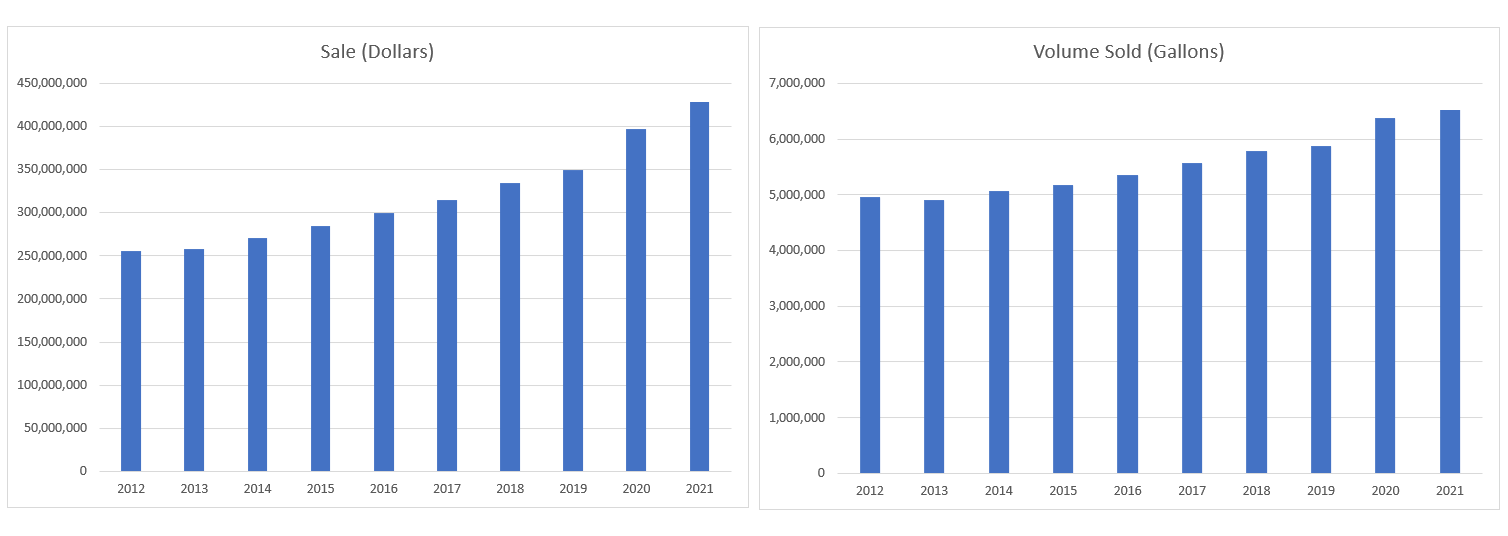

During Section 3, we will be working on determining which column should be our target: 'Sale (Dollars)' or 'Volume Sold (Gallons). On the one hand, the first choice appears to have a better correlation with the dataset, while on the other hand, 'Volume Sold (Gallons)' is a variable that could be used as a reference by the Iowa Alcoholic Beverage Division in case they wish to predict income by modifying the fees ('State Bottle Retail').





#D. Project Development

##1.- Libraries

In [1]:
# Importing libraries.
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

##2.-  Loading Data

###2.1.- Mount and loading
- We downloaded 3 CSV files, one per year: [2019](https://data.iowa.gov/Sales-Distribution/2019-Iowa-Liquor-Sales/38x4-vs5h), [2020](https://data.iowa.gov/Sales-Distribution/2020-Iowa-Liquor-Sales/ktcd-5fm8), and [2021](https://data.iowa.gov/Sales-Distribution/2021-Iowa-Liquor-Sales/cc6f-sgik). Those will be [concatenated](https://pandas.pydata.org/docs/user_guide/merging.html) in order to have a new dataset including the years to work with. 

In [2]:
# Mount data.
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Load data from 2019.
df2019 = pd.read_csv('/content/drive/MyDrive/Coding Dojo Classes/Machine Learning/Week 4/2019_Iowa_Liquor_Sales.csv')

In [4]:
# Load data from 2020.
df2020 = pd.read_csv('/content/drive/MyDrive/Coding Dojo Classes/Machine Learning/Week 4/2020_Iowa_Liquor_Sales.csv')

In [5]:
# Load data from 2021.
df2021 = pd.read_csv('/content/drive/MyDrive/Coding Dojo Classes/Machine Learning/Week 4/2021_Iowa_Liquor_Sales.csv')

In [6]:
# Let's concatenate 3 datasets.
dfsets = [df2019, df2020, df2021]
df = pd.concat(dfsets, keys=["2019", "2020", "2021"])

In [7]:
# Let's display our new dataset.
df.head(10)

Invoice/Item Number        Date  Store Number  \
2019 0     INV-16681900011  01/02/2019          5286   
     1     INV-16681900027  01/02/2019          5286   
     2     INV-16681900018  01/02/2019          5286   
     3     INV-16685400036  01/02/2019          2524   
     4     INV-16690300035  01/02/2019          4449   
     5     INV-16685400064  01/02/2019          2524   
     6     INV-16685400008  01/02/2019          2524   
     7     INV-16685400039  01/02/2019          2524   
     8     INV-16693100041  01/02/2019          5151   
     9     INV-16692900004  01/02/2019          4116   

                         Store Name             Address       City  Zip Code  \
2019 0                        Sauce        108, College  Iowa City   52240.0   
     1                        Sauce        108, College  Iowa City   52240.0   
     2                        Sauce        108, College  Iowa City   52240.0   
     3  Hy-Vee Food Store / Dubuque       3500 Dodge St    Dubuque   52001.0   
     4    Kum & Go #121 / Urbandale  12041 Douglas Pkwy  Urbandale   50322.0   
     5  Hy-Vee Food Store / Dubuque       3500 Dodge St    Dubuque   52001.0   
     6  Hy-Vee Food Store / Dubuque       3500 Dodge St    Dubuque   52001.0   
     7  Hy-Vee Food Store / Dubuque       3500 Dodge St    Dubuque   52001.0   
     8                   IDA Liquor        500, Hwy 175  Ida Grove   51445.0   
     9              Lake View Foods         223 Main St  Lake View   51450.0   

       Store Location  County Number   County  ...  Item Number  \
2019 0            NaN           52.0  JOHNSON  ...        48099   
     1            NaN           52.0  JOHNSON  ...        89191   
     2            NaN           52.0  JOHNSON  ...         8824   
     3            NaN           31.0  DUBUQUE  ...        35917   
     4            NaN           77.0     POLK  ...        36304   
     5            NaN           31.0  DUBUQUE  ...        63355   
     6            NaN           31.0  DUBUQUE  ...        11297   
     7            NaN           31.0  DUBUQUE  ...        36307   
     8            NaN           47.0      IDA  ...        15248   
     9            NaN           81.0      SAC  ...        43126   

                          Item Description  Pack Bottle Volume (ml)  \
2019 0                         Hennessy VS    24                200   
     1  Jose Cuervo Especial Reposado Mini    12                500   
     2                            Lauder's    24                375   
     3                  Five O'Clock Vodka    12               1000   
     4                       Hawkeye Vodka    24                375   
     5                Skinnygirl Margarita    12                750   
     6                         Crown Royal    12               1000   
     7                       Hawkeye Vodka    12               1000   
     8                Windsor Canadian PET     6               1750   
     9                    Bacardi Superior    12                750   

        State Bottle Cost State Bottle Retail  Bottles Sold  Sale (Dollars)  \
2019 0               6.24                9.36            24          224.64   
     1              11.50               17.25            12          207.00   
     2               3.21                4.82            24          115.68   
     3               4.17                6.26            12           75.12   
     4               1.86                2.79            24           66.96   
     5               6.29                9.44             6           56.64   
     6              18.89               28.34            24          680.16   
     7               4.05                6.08            36          218.88   
     8               9.50               14.25             6           85.50   
     9               8.26               12.39            12          148.68   

        Volume Sold (Liters)  Volume Sold (Gallons)  
2019 0                   4.8                   1.26  
     1     

###2.2.- Data dictionary

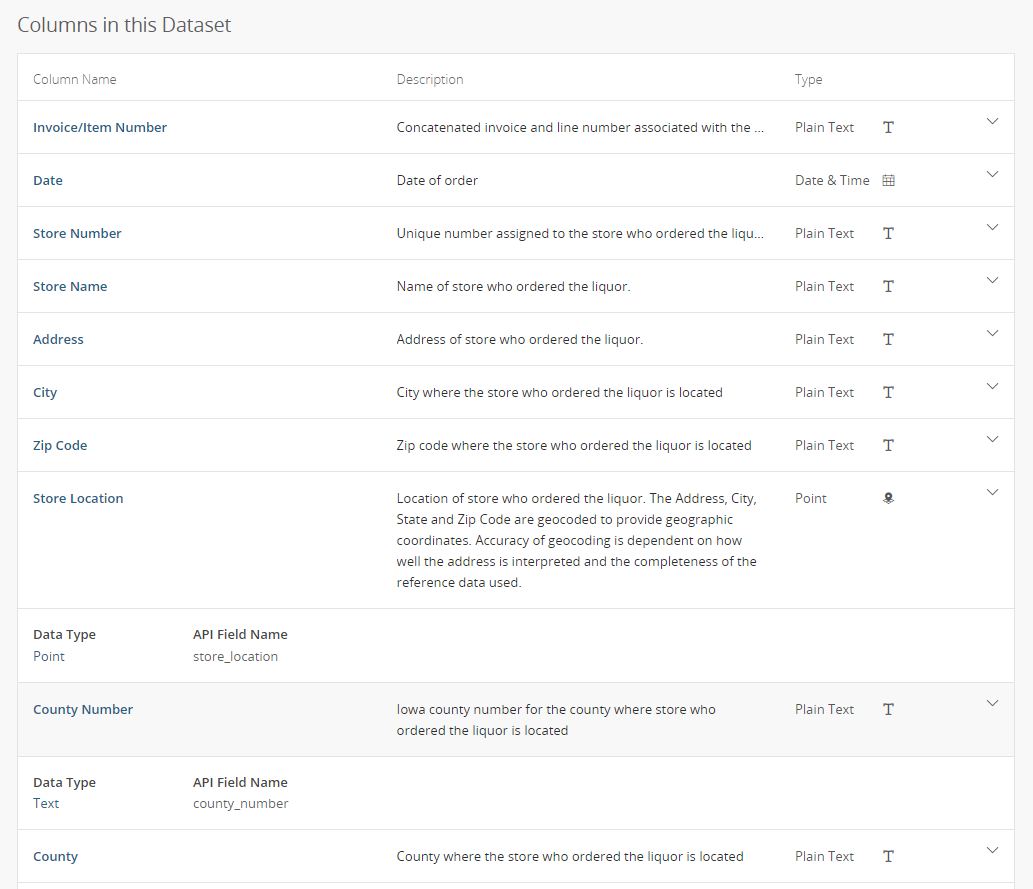


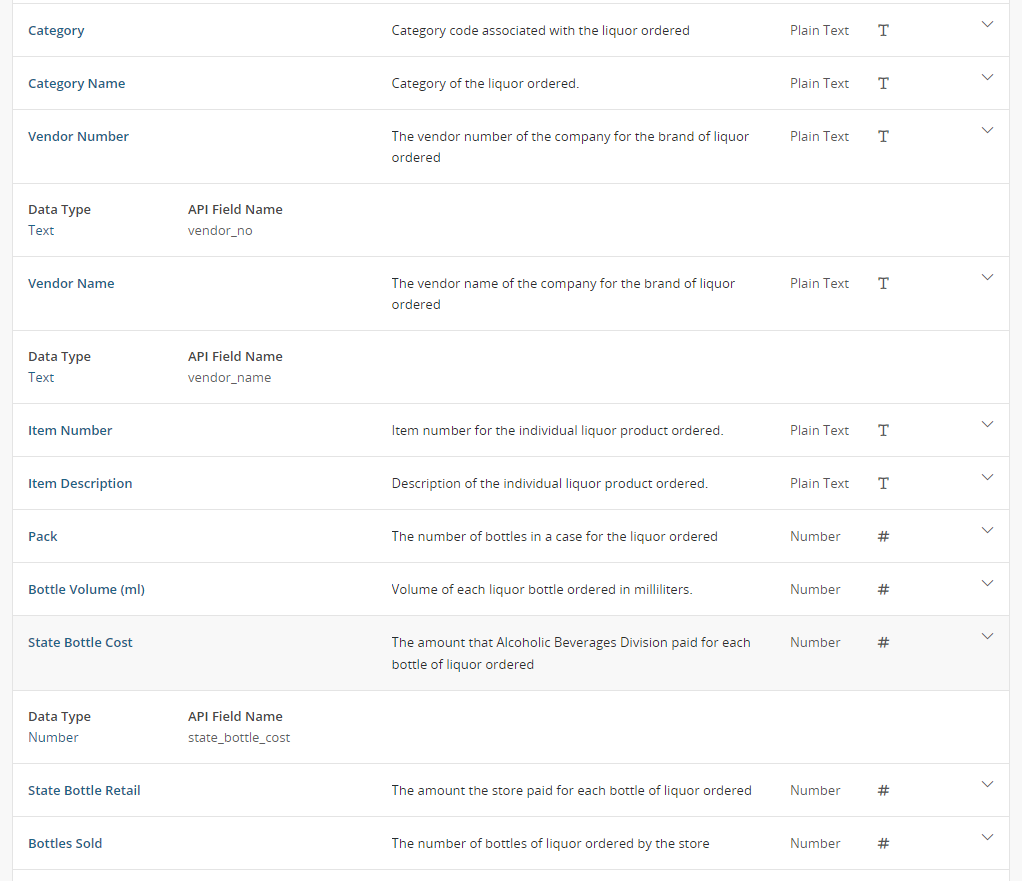

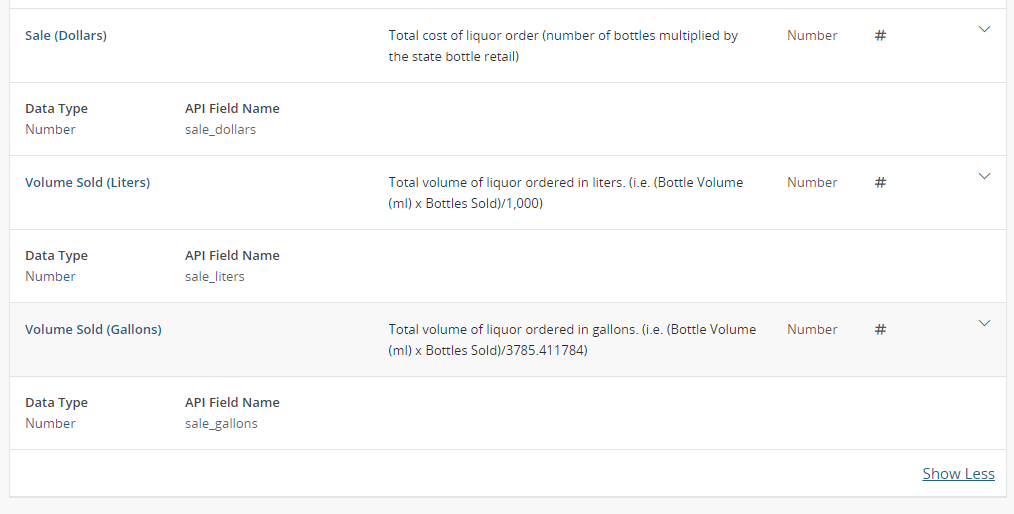

##3.- Data Understanding

In [8]:
# Let's see the general information of our dataset.
df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 7617422 entries, ('2019', 0) to ('2021', 2622711)
Data columns (total 24 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Invoice/Item Number    object 
 1   Date                   object 
 2   Store Number           int64  
 3   Store Name             object 
 4   Address                object 
 5   City                   object 
 6   Zip Code               float64
 7   Store Location         object 
 8   County Number          float64
 9   County                 object 
 10  Category               float64
 11  Category Name          object 
 12  Vendor Number          float64
 13  Vendor Name            object 
 14  Item Number            int64  
 15  Item Description       object 
 16  Pack                   int64  
 17  Bottle Volume (ml)     int64  
 18  State Bottle Cost      float64
 19  State Bottle Retail    float64
 20  Bottles Sold           int64  
 21  Sale (Dollars)         float64
 22

In [9]:
# Let's display the size of our dataframe.
df.shape

(7617422, 24)

In [10]:
# Let's check the statistical summary.
df.describe().round(2)

,Store Number,Zip Code,County Number,Category,Vendor Number,Item Number,Pack,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
count,7617422.00,7612381.00,7612381.00,7613822.00,7617417.00,7617422.00,7617422.00,7617422.00,7617422.00,7617422.00,7617422.00,7617422.00,7617422.00,7617422.00
mean,4016.56,51255.41,57.31,1054052.27,275.06,51353.79,12.16,845.85,10.86,16.28,11.54,154.12,9.36,2.47
std,1205.81,990.42,27.28,98659.80,140.56,79954.17,8.01,525.88,9.89,14.84,33.47,540.30,39.69,10.48
min,2106.00,50002.00,1.00,1011000.00,33.00,159.00,1.00,20.00,0.33,0.50,1.00,1.30,0.02,0.00
25%,2633.00,50315.00,31.00,1012200.00,205.00,27037.00,6.00,600.00,5.78,8.67,3.00,38.40,1.50,0.39
50%,4092.00,51055.00,63.00,1031200.00,260.00,39422.00,12.00,750.00,8.74,13.11,6.00,81.27,4.80,1.26
75%,5102.00,52302.00,77.00,1062500.00,395.00,64870.00,12.00,1000.00,13.50,20.25,12.00,161.64,10.50,2.77
max,9946.00,57222.00,99.00,1901200.00,978.00,999993.00,120.00,6000.00,2098.94,3148.41,13200.00,250932.00,13200.00,3487.07


In [11]:
# Looking for missing data.
df.isna().sum()

Invoice/Item Number           0
Date                          0
Store Number                  0
Store Name                    0
Address                    5041
City                       5041
Zip Code                   5041
Store Location           767816
County Number              5041
County                     5041
Category                   3600
Category Name              3600
Vendor Number                 5
Vendor Name                   5
Item Number                   0
Item Description              0
Pack                          0
Bottle Volume (ml)            0
State Bottle Cost             0
State Bottle Retail           0
Bottles Sold                  0
Sale (Dollars)                0
Volume Sold (Liters)          0
Volume Sold (Gallons)         0
dtype: int64

In [12]:
df.isna().sum().sum()

800231

In [13]:
# Let's identify duplicate data.
df.duplicated().sum()

0

In [14]:
# Identify inconsistencies in our 'object' columns.
pd.set_option('display.max_rows', None)
for col in df.select_dtypes(include='object').columns:
  print(df[col].value_counts())
  print('\n')

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Streaming output truncated to the last 5000 lines.
El Mayor Reposado                                                 1273
E & J VSOP Mini                                                   1272
Calvert Extra Bl Whiskey                                          1267
UV Blue Raspberry Lemonade PET                                    1266
Evan Williams 1783                                                1266
Ice 101 Peppermint Schnapps                                       1265
Rebel KSBW                                                        1265
Jameson Caskmates IPA                                             1262
Fireball PET                                                      1261
Jose Cuervo Tradicional Reposado                                  1257
1800 Ultimate Pineapple Margarita                                 1256
Admiral Nelson Cherry Spiced                                      1255
Sauza Blue Silver                                                 1250
Sweet Revenge             

**Observations:**
- We must keep in mind that the project objective is to predict the sales (Gallons or $$) for 2022. For this reason, we decided to drop the columns we consider don't affect the sales:
  - Invoice/Item Number.
  - Date.
  - Store Number.
  - Store Name.
  - Address.
  - Zip Code.
  - Store Location.
  - Category.
  - County Number.
  - Vendor Number.
  - Item Number.
  - Item Description. It's a variable that could affect the sales from consumer point of view, but like in this case we are focusing in the global sales instead per product, this column will be droped too.

- According to the code above, our current dataset has:
  - 7,617,422 rows and 24 columns.
  - Around 10% of missing data (800,231).
    - The majority of the missing data is located in rows that will be dropped.
    - The good new is that we don't have missing data on both possible target columns ('Sale (Dollars)' & 'Volume Sold (Gallons)').
  - 0 duplicate data.
    - Duplicate data is a value that won't be calculated on future code, because after eliminate unique elements the probability to have rows with equal values is high.
  - We identify some inconsistencies in dtype object columns but after dropping the columns describe above, we are going to check this parameter again and fix any inconsistency on features.

##4.- Data Cleaning
- In this section, we are going to prepare the data to have it clean and ready for the split between Features (X) and Target (y).

In [15]:
# Drop unnecessary columns.
df.drop(columns = ['Invoice/Item Number', 'Date', 'Store Number',
                   'Store Name', 'Address', 'Zip Code',
                   'Store Location', 'Category', 'County Number',
                   'Vendor Number', 'Item Number', 'Item Description'],
        inplace = True)
df.head(5)

City   County      Category Name            Vendor Name  Pack  \
2019 0  Iowa City  JOHNSON  Imported Brandies      MOET HENNESSY USA    24   
     1  Iowa City  JOHNSON      Mixto Tequila                PROXIMO    12   
     2  Iowa City  JOHNSON    Scotch Whiskies  SAZERAC NORTH AMERICA    24   
     3    Dubuque  DUBUQUE    American Vodkas        Laird & Company    12   
     4  Urbandale     POLK    American Vodkas              LUXCO INC    24   

        Bottle Volume (ml)  State Bottle Cost  State Bottle Retail  \
2019 0                 200               6.24                 9.36   
     1                 500              11.50                17.25   
     2                 375               3.21                 4.82   
     3                1000               4.17                 6.26   
     4                 375               1.86                 2.79   

        Bottles Sold  Sale (Dollars)  Volume Sold (Liters)  \
2019 0            24          224.64                   4.8   
     1            12          207.00                   6.0   
     2            24          115.68                   9.0   
     3            12           75.12                  12.0   
     4            24           66.96                   9.0   

        Volume Sold (Gallons)  
2019 0                   1.26  
     1                   1.58  
     2                   2.37  
     3                   3.17  
     4                   2.37

In [16]:
# Looking for missing data.
df.isna().sum()

City                     5041
County                   5041
Category Name            3600
Vendor Name                 5
Pack                        0
Bottle Volume (ml)          0
State Bottle Cost           0
State Bottle Retail         0
Bottles Sold                0
Sale (Dollars)              0
Volume Sold (Liters)        0
Volume Sold (Gallons)       0
dtype: int64

In [17]:
df.isna().sum().sum()

13687

In [18]:
# Identify inconsistencies in our 'object' columns.
pd.set_option('display.max_rows', None)
for col in df.select_dtypes(include='object').columns:
  print(df[col].value_counts())
  print('\n')

Des Moines           624009
Cedar Rapids         489566
Davenport            317801
West Des Moines      236078
Waterloo             232532
Sioux City           230740
Council Bluffs       221602
Ames                 194929
Iowa City            191254
Dubuque              190896
Ankeny               164401
Cedar Falls          163487
Coralville           122837
Mason City           105721
Urbandale             94988
Muscatine             94768
Bettendorf            87581
Burlington            86045
Fort Dodge            84402
Ottumwa               77893
Marshalltown          77278
Marion                75979
Clinton               75058
Altoona               68457
Windsor Heights       64144
Waukee                53693
Grimes                52956
Keokuk                51825
Spencer               51582
Storm Lake            50832
Newton                48783
Spirit Lake           44916
Boone                 43992
Waverly               42231
Johnston              42174
Oskaloosa           

In [19]:
# Let's have a closer look in 'Category Name'.
df_ed = df.groupby('Category Name').agg(value_count = ('Category Name','count')).sort_values(by = ['Category Name','value_count'], ascending = [True,False])
df_ed # conde inspired by https://www.appsloveworld.com/pandas/100/419/pandas-dataframe-how-to-sort-alphabetically-column-values-with-value-counts

,value_count
Category Name,
100% Agave Tequila,235692
Aged Dark Rum,23029
American Brandies,216773
American Cordials & Liqueur,176094
American Cordials & Liqueurs,771
American Distilled Spirit Specialty,19957
American Distilled Spirits Specialty,61
American Dry Gins,138632
American Flavored Vodka,356091


In [20]:
# Let's have a closer look in 'City'.
df_ed1 = df.groupby('City').agg(value_count = ('City','count')).sort_values(by = ['City','value_count'], ascending = [True,False])
df_ed1

,value_count
City,
Ackley,1599
Adair,2706
Adel,12785
Afton,1036
Akron,1358
Albert City,376
Albia,9739
Albion,519
Alburnett,357


In [21]:
# Let's have a closer look in 'County'.
df_ed2 = df.groupby('County').agg(value_count = ('County','count')).sort_values(by = ['County','value_count'], ascending = [True,False])
df_ed2

,value_count
County,
ADAIR,12031
ADAMS,6596
ALLAMAKEE,29953
APPANOOSE,23769
AUDUBON,9968
Adair,2483
BENTON,43828
BLACK HAWK,425752
BOONE,53337


In [22]:
# Let's see the general information of our dataset.
df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 7617422 entries, ('2019', 0) to ('2021', 2622711)
Data columns (total 12 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   City                   object 
 1   County                 object 
 2   Category Name          object 
 3   Vendor Name            object 
 4   Pack                   int64  
 5   Bottle Volume (ml)     int64  
 6   State Bottle Cost      float64
 7   State Bottle Retail    float64
 8   Bottles Sold           int64  
 9   Sale (Dollars)         float64
 10  Volume Sold (Liters)   float64
 11  Volume Sold (Gallons)  float64
dtypes: float64(5), int64(3), object(4)
memory usage: 818.2+ MB


**Observations:**
- According to the code above:
  - Missing data:
    - In total, we have around ~ 0.2% missing data. We have decided to drop them because of the minimal impact on our dataset.
  - Inconsistencies in categorical features:
    - In 'Categorical Name' and 'City' we found some misspellings.
    - In 'County' words in capitalized instead of the mayor.
  - Data type:
    - Any issue to be fixed.
- All the issues pointed will be addressed in code below.

In [29]:
# Let's follow the procedure indicated above.
df.dropna(inplace=True)

In [30]:
# Confirm there is not missing data.
df.isna().sum()

City                     0
County                   0
Category Name            0
Vendor Name              0
Pack                     0
Bottle Volume (ml)       0
State Bottle Cost        0
State Bottle Retail      0
Bottles Sold             0
Sale (Dollars)           0
Volume Sold (Liters)     0
Volume Sold (Gallons)    0
dtype: int64

In [31]:
df.isna().sum().sum()

0

In [74]:
# Let's address the inconsistencies found in 'Category Name'.
plural_fix = {'American Cordials & Liqueurs':'American Cordials & Liqueur',
              'American Distilled Spirits Specialty': 'American Distilled Spirit Specialty',
              'American Vodkas': 'American Vodka',
              'Cocktails /RTD': 'Cocktails / RTD',
              'Imported Cordials & Liqueurs': 'Imported Cordials & Liqueur',
              'Imported Distilled Spirits Specialty': 'Imported Distilled Spirit Specialty',
              'Imported Vodkas': 'Imported Vodka',
              'Temporary & Specialty Packages': 'Temporary & Specialty Package'}

df['Category Name'] = df['Category Name'].replace(plural_fix)

In [75]:
## Let's confirm the fixxed issue.
df.groupby('Category Name').agg(value_count = ('Category Name','count')).sort_values(by = ['Category Name','value_count'], ascending = [True,False])

,value_count
Category Name,
100% Agave Tequila,235549
Aged Dark Rum,23010
American Brandies,216649
American Cordials & Liqueur,176752
American Distilled Spirit Specialty,20006
American Dry Gins,138532
American Flavored Vodka,355836
American Schnapps,242789
American Sloe Gins,2491


In [58]:
# Let's address the inconsistencies found in 'City'.
city_fix = {"Arnold's Park": 'Arnolds Park',
            'ClearLake': 'Clear Lake'}

df['City'] = df['City'].replace(city_fix)

In [59]:
## Let's confirm the fixxed issue.
df.groupby('City').agg(value_count = ('City','count')).sort_values(by = ['City','value_count'], ascending = [True,False])

,value_count
City,
Ackley,1599
Adair,2706
Adel,12781
Afton,1036
Akron,1358
Albert City,376
Albia,9738
Albion,519
Alburnett,357


In [68]:
# Let's address the inconsistencies found in 'County'.
county_fix = {'Adair': 'ADAIR',
              'Black Hawk': 'BLACK HAWK',
              'Boone': 'BOONE',
              'Butler': 'BUTLER',
              'BUTlER': 'BUTLER',
              'Cerro Gord': 'CERRO GORD',
              'Clayton': 'CLAYTON',
              'Dallas': 'DALLAS',
              'Delaware': 'DELAWARE',
              'Des Moines': 'DES MOINES',
              'Dickinson': 'DICKINSON',
              'Fayette': 'FAYETTE',
              'Hancock': 'HANCOCK',
              'Hardin': 'HARDIN',
              'Henry': 'HENRY',
              'Iowa': 'IOWA',
              'Jackson': 'JACKSON',
              'Jasper': 'JASPER',
              'Kossuth': 'KOSSUTH',
              'Linn': 'LINN',
              'Madison': 'MADISON',
              'Marion': 'MARION',
              'Marshall': 'MARSHALL',
              'Mitchell': 'MITCHELL',
              'Plymouth': 'PLYMOTH',
              'Polk': 'POLK',
              'Pottawatta': 'POTTAWATTA',
              'Poweshiek': 'POWESHIEK',
              'Scott': 'SCOTT',
              'Wapello': 'WAPELLO',
              'Webster': 'WEBSTER'}

df['County'] = df['County'].replace(county_fix)

In [69]:
## Let's confirm the fixxed issue.
df.groupby('County').agg(value_count = ('County','count')).sort_values(by = ['County','value_count'], ascending = [True,False])

,value_count
County,
ADAIR,14512
ADAMS,6594
ALLAMAKEE,29952
APPANOOSE,23757
AUDUBON,9968
BENTON,43789
BLACK HAWK,432992
BOONE,54054
BREMER,55538


**Observations:**
- For an unknown reason, the category "Temporary & Specialty Packages" on 'Category Name' is the only only one we couldn't fix. 
- Let's continue and see if we could find a solution later.

##5.- Visual Exploration
- This section is part of our data understanding process, but this time with data cleaned and plotting some graphs.

In [32]:
# Calculating the correlation.
corr = df.corr()
df.corr()

,Pack,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
Pack,1.000000,-0.509308,-0.343981,-0.343990,0.184025,-0.042377,-0.045316,-0.045335
Bottle Volume (ml),-0.509308,1.000000,0.179331,0.179325,-0.022915,0.077171,0.142905,0.142968
State Bottle Cost,-0.343981,0.179331,1.000000,0.999858,-0.067769,0.102336,0.000065,0.000061
State Bottle Retail,-0.343990,0.179325,0.999858,1.000000,-0.067772,0.102346,0.000066,0.000062
Bottles Sold,0.184025,-0.022915,-0.067769,-0.067772,1.000000,0.819605,0.855901,0.855899
Sale (Dollars),-0.042377,0.077171,0.102336,0.102346,0.819605,1.000000,0.842043,0.842042
Volume Sold (Liters),-0.045316,0.142905,0.000065,0.000066,0.855901,0.842043,1.000000,1.000000
Volume Sold (Gallons),-0.045335,0.142968,0.000061,0.000062,0.855899,0.842042,1.000000,1.000000


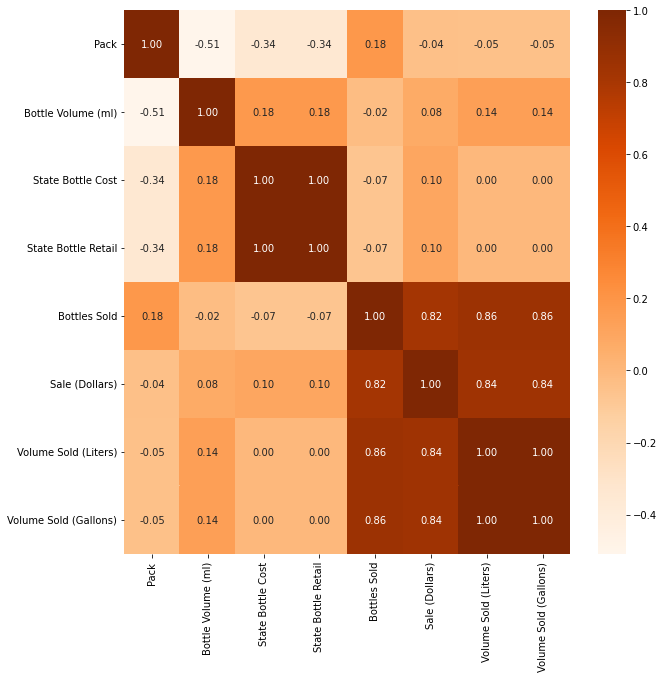

In [33]:
# Let's plot our heatmap.
plt.figure(figsize=(10,10))
sns.heatmap(corr, cmap='Oranges', annot=True, fmt='.2f');

**Observations:**
- According to the plot above:
  - Sale (Dollars):
    - Has a strong correlation with:
      - Bottles Sold = 0.82.
      - Volume Sold (Liters) = 0.84.
      - Volume Sold (Gallons) = 0.84.
  - Volume Sold (Gallons):
    - Has a strong correlation with:
      - Bottles Sold = 0.86.
      - Sale (Dollars) = 0.84.
      - Volume Sold (Liters) = 1.00 (as was expected).
- Because we identinfied a stronger correlation between 'Bottle Sold' and 'Volume Sold (Gallons)' than 'Bottle Sold' and 'Sale (Dollars)', we decided to declare 'Volume Sold (Gallons)' as our Target (y).
  

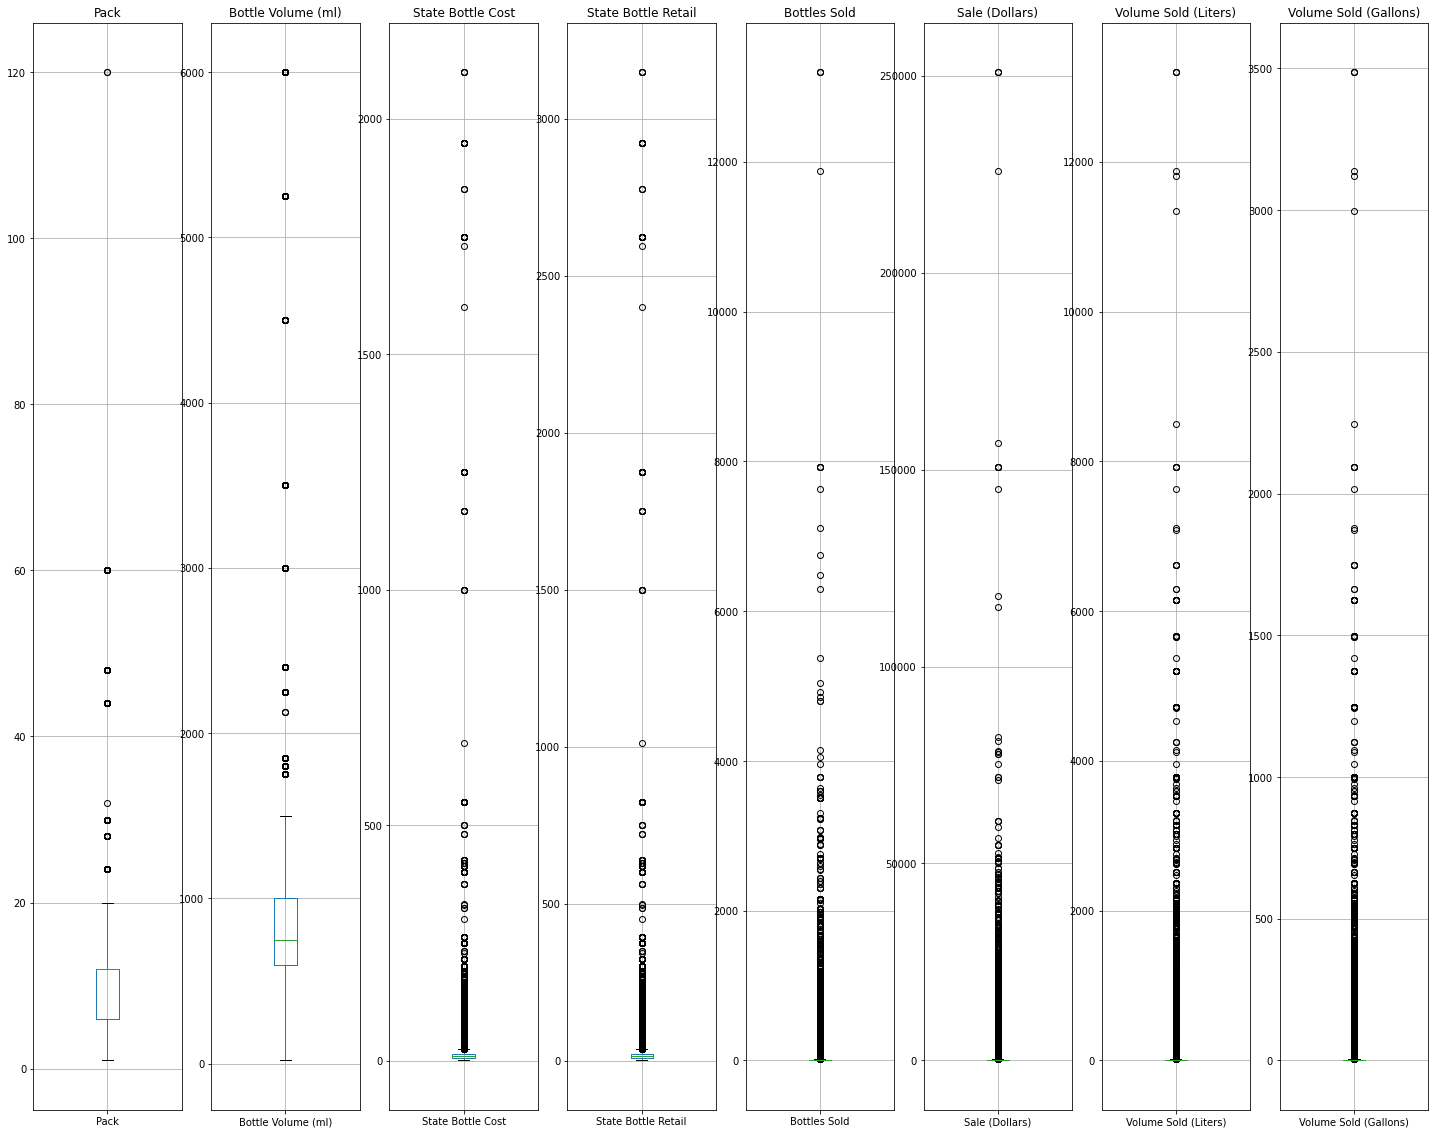

In [82]:
# Let's idenfity outliers for numerical data.
fig, axes = plt.subplots(1,8, figsize=(25,20))
df.boxplot(column = 'Pack', ax=axes[0])
axes[0].set_title('Pack')
df.boxplot(column = 'Bottle Volume (ml)', ax=axes[1])
axes[1].set_title('Bottle Volume (ml)')
df.boxplot(column = 'State Bottle Cost', ax=axes[2])
axes[2].set_title('State Bottle Cost')
df.boxplot(column = 'State Bottle Retail', ax=axes[3])
axes[3].set_title('State Bottle Retail')
df.boxplot(column = 'Bottles Sold', ax=axes[4])
axes[4].set_title('Bottles Sold')
df.boxplot(column = 'Sale (Dollars)', ax=axes[5])
axes[5].set_title('Sale (Dollars)')
df.boxplot(column = 'Volume Sold (Liters)', ax=axes[6])
axes[6].set_title('Volume Sold (Liters)')
df.boxplot(column = 'Volume Sold (Gallons)', ax=axes[7])
axes[7].set_title('Volume Sold (Gallons)');

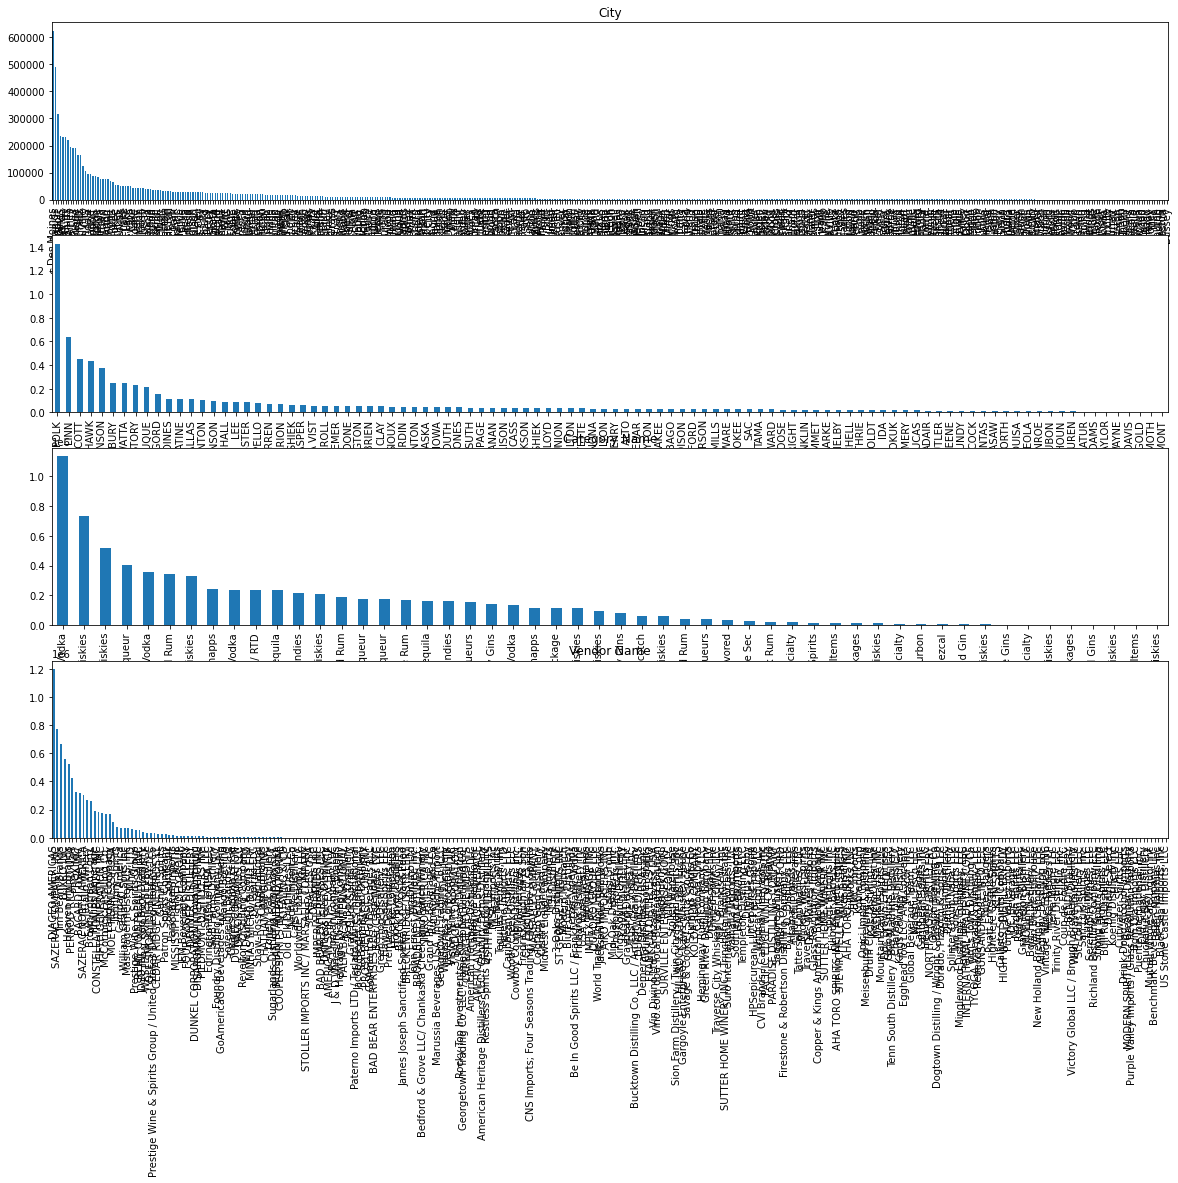

In [85]:
# Let's graph some histograms for categorical features.
fig, axes = plt.subplots(4,1, figsize=(20,15))
df['City'].value_counts().plot(kind = 'bar', ax=axes[0])
axes[0].set_title('City')
df['County'].value_counts().plot(kind = 'bar', ax=axes[1])
axes[1].set_title('County')
df['Category Name'].value_counts().plot(kind = 'bar', ax=axes[2])
axes[2].set_title('Category Name')
df['Vendor Name'].value_counts().plot(kind = 'bar', ax=axes[3])
axes[3].set_title('Vendor Name');

##6.- Data Preparation for Machine Learning

This section will be develop in next stack.

#E. Project Conclusions

- As we displayed in code line [10] and the boxplots, we should make a deep analysis of the outliers and address them. We have maximum values too high.
- We should find a way to export the dataset concatenated in order to have an easier flow on the notebook.
- The graphs plot for categorical were made to comply to the assignment, but having too many categories, we should fins another way to visually explore this features.
- We have to find the error about  the category "Temporary & Specialty Packages" on 'Category Name' is the only only one we couldn't fix it.